# Homework 1

### Deadline: Monday 24 March 2024 (by 19h00)

### Credits: 20 points

### Instructions:

- When you finish, please submit a single **.ipynb** file via email to wbanda@yachaytech.edu.ec


- The homework is **individual**. Please include your name in the notebook.


- Within a **single python notebook**, solve the following problems.

# Name: Males-Araujo Yorlan

## 1. Population dynamics (8 points)

The system of ordinary differential equations (ODEs) describing the population dynamics of two prey species ($x$ and $y$) and one predator species ($z$) is given by:


\begin{aligned}
\frac{dx}{dt} &= g_1\,x \left( 1 - \frac{x}{c_1} \right) - p_1\,x\,z, \\
\frac{dy}{dt} &= g_2\,y \left( 1 - \frac{y}{c_2} \right) - p_2\,y\,z, \\
\frac{dz}{dt} &= e_1\,p_1\,x\,z + e_2\,p_2\,y\,z - d\,z.
\end{aligned}


where:

- $g_1$, $g_2$ are the intrinsic growth rates (e.g. birth rates) of the prey populations,

- $c_1$, $c_2$ are the carrying capacities of the prey populations (the carrying capacity of an environment is the maximum population size of a biological species that can be sustained by that specific environment), 
  
- $p_1$, $p_2$ are the predation rates of the predator on each prey (e.g. how successful a hunt is),

- $e_1$, $e_2$ are the conversion efficiencies of consumed prey into predator biomass (the conversion efficiency tells us how efficiently a predator can use the energy from its prey to reproduce),

- $d$ is the natural death rate of the predator. Note that the death rates of the two prey species are intrinsically given by their individual carrying capacities.

This system models the interactions where both prey species grow logistically but are consumed by a common predator.

In [1]:
# Libraries
import time
import numpy as np
import sympy as sp
import scienceplots
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

In [2]:
# Set the plot style
plt.style.use(['science', 'notebook', 'no-latex'])

### State vector and slope:

#### **(a)** Write down this system of ODEs in terms of the system state vector $S(t)$, i.e. $\frac{dS}{dt} = F(S)$. Identify the slope function $F(S)$ and indicate whether or not it can be explicitly written as a function of $S$. Create a python function for the slope $F(S)$.

Taking the state vector as $S(t) = [x(t), y(t), z(t)]^{\top}$, the system of ODEs can be written as:

\begin{aligned}
\frac{dS}{dt} = F(S) = \begin{bmatrix}
g_1\,x \left( 1 - \frac{x}{c_1} \right) - p_1\,x\,z \\
g_2\,y \left( 1 - \frac{y}{c_2} \right) - p_2\,y\,z \\
e_1\,p_1\,x\,z + e_2\,p_2\,y\,z - d\,z
\end{bmatrix},
\end{aligned}

which is practically the same as the original system. **The slope function $F(S)$ can be explicitly written as a function of $S$.**

In [ ]:
# We now create the slope function
def slope(t, S, params):
    """
    Slope of the ODE system.

    Parameters
    ----------
    t : float
        The time (not used).
    s : np.ndarray
        State vector, [x y z].
    params : dict
        All the system parameters.

    Returns
    -------
    np.ndarray
        The slope array.
    """
    # Get the state variables
    x, y, z = S

    # Get the parameters
    g1 = params['g1']
    c1 = params['c1']
    p1 = params['p1']
    g2 = params['g2']
    c2 = params['c2']
    p2 = params['p2']
    e1 = params['e1']
    e2 = params['e2']
    d = params['d']

    # Compute the slope
    dx_dt = g1*x*(1 - x/c1) - p1*x*z
    dy_dt = g2*y*(1 - y/c2) - p2*y*z
    dz_dt = e1*p1*x*z + e2*p2*y*z - d*z
    
    return np.array([dx_dt, dy_dt, dz_dt])

### ODE integration methods:

#### **(b)** Create a python function that implements a trapezoidal Euler method for ODE integration.

The trapezoidal Euler method is given by

\begin{aligned}
S(t_{i+1})= S(t_i) + \frac{h}{2}\left(k_1 + k_2\right),
\end{aligned}

where $k_1 = F(t_i, S(t_i))$, $k_2 = F(t_i + h, S(t_i) + h\,k_1)$, and $h$ is the step size. *The method is of implicit type*.

In [3]:
def trapezoidal(slope_func, t_span, s0, h, params):
    """
    It integrates an ODE system using the trapezoidal method.

    Parameters
    ----------
    slope_func : callable
        The slope function.
    t_range : tuple
        Start and stop time.
    s0 : np.ndarray
        The initial conditions.
    h : float
        The step size.
    params : dict
        The system parameters.

    Returns
    -------
    np.ndarray
        The time vector.
    np.ndarray
        The state vector.
    """
    # Determine the number of steps
    t0, tf = t_span
    steps = int((tf - t0)/h)

    # Initialize the time and state vectors
    t = np.linspace(t0, tf, steps + 1)
    S = np.zeros((steps + 1, len(s0)))

    # Set the initial conditions
    S[0] = s0

    # Integrate the system
    for i in range(0, steps):
        
        # Compute the slopes
        k1 = slope_func(t[i], S[i], params)
        k2 = slope_func(t[i] + h, S[i] + h*k1, params)

        # Update the state vector
        S[i + 1] = S[i] + h*(k1 + k2)/2

    return t, S

#### **(c)** Design your own third-order RK method (RK3), and create a python function for this integrator.

In [ ]:
def rk3(slope_func, t_span, s0, h, params):
    """
    It integrates the system using my third-order Runge-Kutta method.

    Parameters
    ----------
    slope_func : callable
        The slope function.
    t_range : tuple
        Start and stop time.
    s0 : np.ndarray
        The initial conditions.
    h : float
        The step size.
    params : dict
        The system parameters.

    Returns
    -------
    np.ndarray
        The time vector.
    np.ndarray
        The state vector.
    """
    # Determine the number of steps
    t0, tf = t_span
    steps = int((tf - t0)/h)

    # Initialize the time and state vectors
    t = np.linspace(t0, tf, steps + 1)
    S = np.zeros((steps + 1, len(s0)))

    # Set the initial conditions
    S[0] = s0

    # Integrate the system
    for i in range(0, steps):
        
        # Compute the slopes
        k1 = slope_func(t[i], S[i], params)
        k2 = slope_func(t[i] + h/2, S[i] + h*k1/2, params)
        k3 = slope_func(t[i] + h, S[i] - h*k1 + 2*h*k2, params)

        # Update the state vector
        S[i + 1] = S[i] + h*(k1 + 4*k2 + k3)/6

    return t, S

#### **(d)** Write a python function for the **Butcher's Runge-Kutta method**, which is a popular method for integrating ODEs with a high order of accuracy. It is obtained by following a similar approach to the one we discussed in class. This method uses six points $k_1, k_2, k_3$, $k_4$, $k_5$, and $k_6$. A weighted average of these points is used to produce the approximation of the solution. The algorithm relies on computing the following slopes:

$$
\begin{eqnarray*}
k_1 & = & F(t_j,S(t_j))\\
k_2 & = & F\left(t_j+\frac{h}{4},S(t_j)+\frac{1}{4}k_1h\right)\\
k_3 & = & F\left(t_j+\frac{h}{4},S(t_j)+\frac{1}{8}k_1h+\frac{1}{8}k_2h\right)\\
k_4 & = & F\left(t_j+\frac{h}{2},S(t_j)-\frac{1}{2}k_2h+k_3h\right)\\
k_5 & = & F\left(t_j+\frac{3h}{4},S(t_j)+\frac{3}{16}k_1h+\frac{9}{16}k_4h\right)\\
k_6 & = & F\left(t_j+h,S(t_j)-\frac{3}{7}k_1h+\frac{2}{7}k_2h+\frac{12}{7}k_3h-\frac{12}{7}k_4h+\frac{8}{7}k_5h\right)
\end{eqnarray*}
$$

The solution is then constructed with the step size ($h$, same as `dt`)as follows:

$$
S(t_{j+1}) = S(t_j) + \frac{h}{90}\left(7k_1 + 32k_3 + 12k_4 + 32k_5+7k_6\right).
$$

---
**Adaptive step size implementation**

I want to see the efficiency produced by this technique, so I'll test it by implementing Butcher's RK method with an adaptive step size. The comparison will be done with the previous two methods. 

**Overview of the technique**

I'm going to use one of the simplest adaptive step size methods: **step doubling**. 

In this method, we get to the next point in one full step and in two half steps. Then, we estimate the truncation error by comparing the two results. If the error is smaller than some predefined tolerance, we accept the solution and double the step size. In contrast, if the error is larger than the tolerance, we halve the step size and repeat the process.

---

In [6]:
# Butcher step
def butcher_step(slope_func ,t_curr, s_curr, step, params):
    """
    Next state using the Butcher method.

    Parameters
    ----------
    slope_func : callable
        The slope function.
    t_curr : float
        The current time.
    s_curr : np.ndarray
        The current state.
    step : float
        The step size.
    params : dict
        The system parameters.

    Returns
    -------
    np.ndarray
        The next state.
    """
    # Compute the slopes
    k1 = slope_func(t_curr, s_curr, params)
    k2 = slope_func(t_curr + step/4, s_curr + (step/4) * k1, params)
    k3 = slope_func(t_curr + step/4, s_curr + (step/8) * k1 + (step/8) * k2, params)
    k4 = slope_func(t_curr + step/2, s_curr - (step/2) * k2 + step * k3, params)
    k5 = slope_func(t_curr + 3*step/4, s_curr + (3*step/16) * k1 + (9*step/16) * k4, params)
    k6 = slope_func(t_curr + step, s_curr - (3*step/7) * k1 + (2*step/7) * k2 + (12*step/7) * k3 - (12*step/7) * k4 + (8*step/7) * k5, params)
    
    return s_curr + step/90 * (7*k1 + 32*k3 + 12*k4 + 32*k5 + 7*k6)

In [7]:
def adaptive_butcher(slope_func, t_span, s0, h_init, params, tol = 1e-6):
    """
    Adaptive-step-size Butcher's Runge-Kutta method.

    Parameters
    ----------
    slope_func : callable
        The slope function.
    t_range : tuple
        Start and stop time.
    s0 : np.ndarray 
        The initial conditions.
    h_init : float
        The initial step size.
    tol : float, default = 1e-6
        The tolerance.
    params : dict
        The system parameters.

    Returns
    -------
    np.ndarray
        The time vector.
    np.ndarray
        The state vector.
    """
    # -------------- Initialize the variables --------------

    # Time list (don't know how many steps)
    t0, tf = t_span
    t = [t0]

    # State list (same reasoning)
    S = [s0]

    # Set initial step size
    h = h_init

    # --------------------- Integration -------------------.

    # While the final time is not reached
    while t[-1] < tf:

        # Try a full step
        s_full = butcher_step(slope_func, t[-1], S[-1], h, params)

        # Try two half steps
        s_half = butcher_step(slope_func, t[-1], S[-1], h/2, params)
        s_half = butcher_step(slope_func, t[-1] + h/2, s_half, h/2, params)
        
        # Compute the error between decisions
        error = np.linalg.norm(s_full - s_half)
        
        # ------------ Step size control ------------
        if error < tol:
            
            # Accept the step
            S.append(s_half)
            t.append(t[-1] + h)

            # Increase the step size if error is small
            if error < tol/5:
                h *= 2.0

        else: 
            # Reduce the step size and try a gain
            h *= 0.5

            # Avoid too small steps
            if h < 1e-3:
                h = 1e-3

    return np.array(t), np.array(S)

### Settings and initial conditions:

#### **(e)** Create a dictionary that allocates all the user-defined initial conditions needed for integration, including an option for the user to select the integration method. The default parameters in the dictionary should be:

| Parameter | Value | Description |
|---|---|---|
| `g1` | 1.0 | Growth rate of prey 1 |
| `c1` | 200.0 | Carrying capacity of prey 1 |
| `p1` | 0.01 | Predation rate of predator on prey 1 |
| `g2` | 1.2 | Growth rate of prey 2 |
| `c2` | 150.0 | Carrying capacity of prey 2 |
| `p2` | 0.008 | Predation rate of predator on prey 2 |
| `e1` | 0.08 | Conversion efficiency of prey 1 to predator |
| `e2` | 0.07 | Conversion efficiency of prey 2 to predator |
| `d` | 0.15 | Death rate of predator |
| `x0` | 100.0 | Initial population of prey 1 |
| `y0` | 80.0 | Initial population of prey 2 |
| `z0` | 20.0 | Initial population of predator |
| `t_span` | (0, 200) | Time span for simulation |
| `dt` | 0.01 | Time step size ($=h$) |
| `method` | RK3 | Integration method |

In [8]:
# Dictionary with the default parameters
default_params = {
    'g1': 1.0,
    'c1': 200.0,
    'p1': 0.01,
    'g2': 1.2,
    'c2': 150.0,
    'p2': 0.008,
    'e1': 0.08,
    'e2': 0.07,
    'd': 0.15,
    'x0': 100.0,
    'y0': 80.0,
    'z0': 20.0,
    't_span': (0, 200),
    'dt': 0.01,
    'method': 'RK3'
}

### Time stepping:

#### **(f)** Create a python function that integrates the system of ODEs using the settings and initial conditions as arguments. The function should perform integration for all three methods (according to the option `method`) and return the resulting times ($t$) and system states $S(t)$ as arrays.


In [9]:
def integrator(params):
    """
    Integrates the system based on the given parameters.

    Parameters
    ----------
    params : dict
        The system parameters.

    Returns
    -------
    np.ndarray
        The time vector.
    np.ndarray  
        The state vector.
    """
    # --------------- Inputs ---------------

    # Time span
    t_span = params['t_span']

    # Step size
    dt = params['dt']

    # Initial conditions
    s0 = np.array([params['x0'], params['y0'], params['z0']])

    # Method
    method = params['method']

    # ------------- Integration -------------

    if method == 'RK3':
        t, S = rk3(slope, t_span, s0, dt, params)

    elif method == 'TRAPEZOIDAL':
        t, S = trapezoidal(slope, t_span, s0, dt, params)

    elif method == 'ASBUTCHER':
        t, S = adaptive_butcher(slope, t_span, s0, dt, params)

    else:
        raise ValueError(f"Method {method} is not available.")
    
    return t, S

### Plotting function:

**(g)** Create a python function that takes the times ($t$) and system states $S(t)$ as arguments and returns a 3-panel figure showing the evolution of each species ($x$, $y$, and $z$) in the system as a function of time, $t$.

In [10]:
def plot_results(t, S):
    
    fig, ax = plt.subplots(1, 3, figsize=(12, 4.5), sharey=True)

    plt.suptitle('Population dynamics evolution', fontsize=16)

    # Plot the results
    ax[0].plot(t, S[:, 0], color="green")
    ax[1].plot(t, S[:, 1], color="blue")
    ax[2].plot(t, S[:, 2], color="coral")

    # Labels
    ax[0].set_xlabel('Time')
    ax[0].set_ylabel('Population')
    ax[1].set_xlabel('Time')
    ax[2].set_xlabel('Time')

    ax[1].tick_params(axis='y', labelleft=False)
    ax[2].tick_params(axis='y', labelleft=False)

    # Titles
    ax[0].set_title('Prey 1')
    ax[1].set_title('Prey 2')
    ax[2].set_title('Predator')

    # Grid
    ax[0].grid(True, ls='--')
    ax[1].grid(True, ls='--')
    ax[2].grid(True, ls='--')

    plt.subplots_adjust(wspace=0.0)

    plt.tight_layout()
    plt.show()


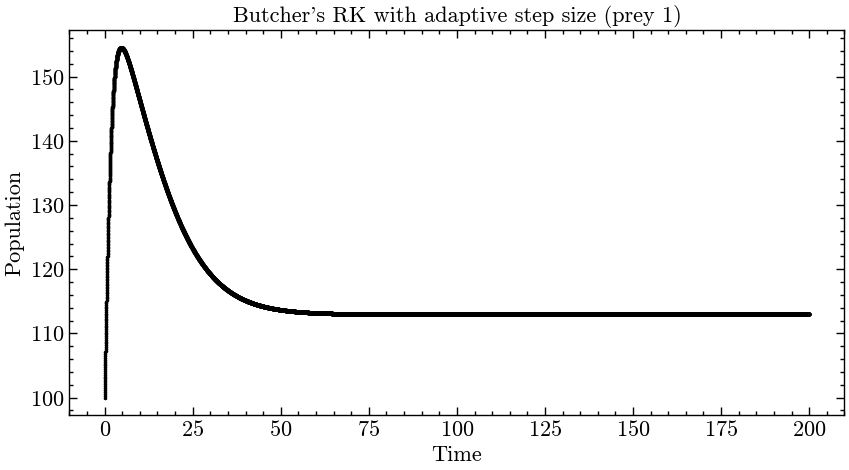

In [11]:
# Try with default parameters
t, S = integrator(default_params)

# Plot the results
plt.figure(figsize=(10, 5))
plt.scatter(t, S[:, 0], color = "k", marker = '.', s = 10)
plt.title("Butcher's RK with adaptive step size (prey 1)")
plt.xlabel("Time")
plt.ylabel("Population")
plt.show()

### Simulation:

#### **(h)** Call your time-stepping and plotting functions to run and display the results of three simulations (one per integration method), using the default settings and initial conditions from the table in (e). Based on your simulations, does the system reach equilibrium?


Starting simulation...

------------------------------------------------
METHOD: TRAPEZOIDAL
------------------------------------------------
INFO:
Time: 0.30 seconds
Number of steps: 20001
Equilibrium reached: True
------------------------------------------------
RESULTS:


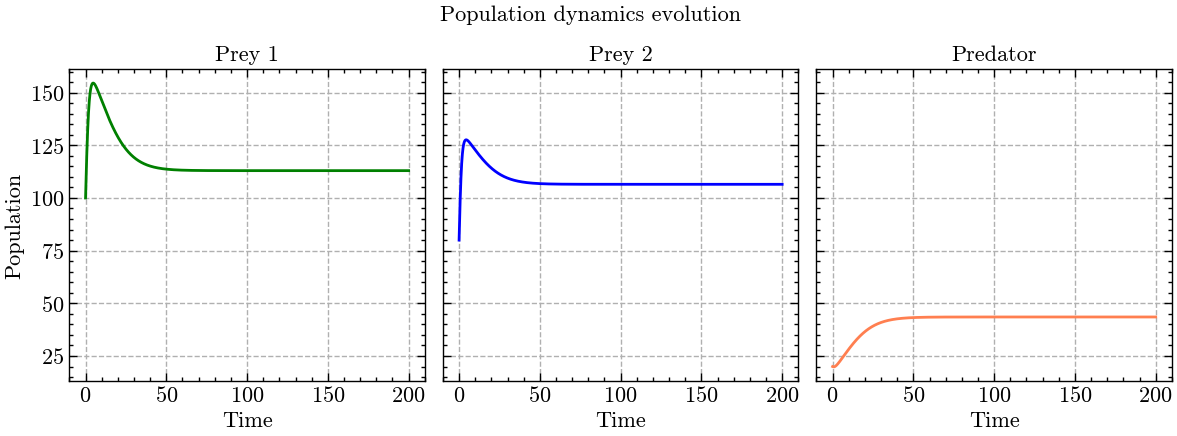

------------------------------------------------
METHOD: RK3
------------------------------------------------
INFO:
Time: 0.57 seconds
Number of steps: 20001
Equilibrium reached: True
------------------------------------------------
RESULTS:


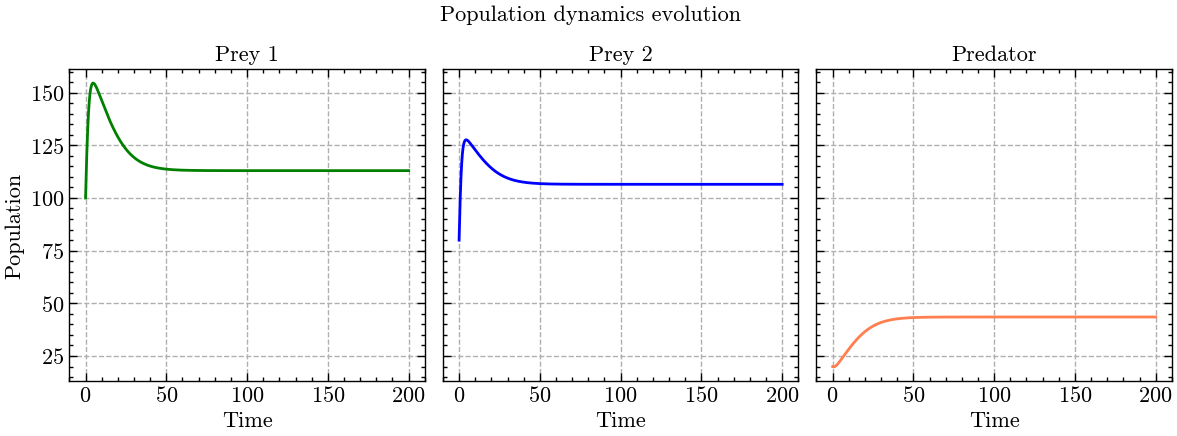

------------------------------------------------
METHOD: ASBUTCHER
------------------------------------------------
INFO:
Time: 0.04 seconds
Number of steps: 119
Equilibrium reached: True
------------------------------------------------
RESULTS:


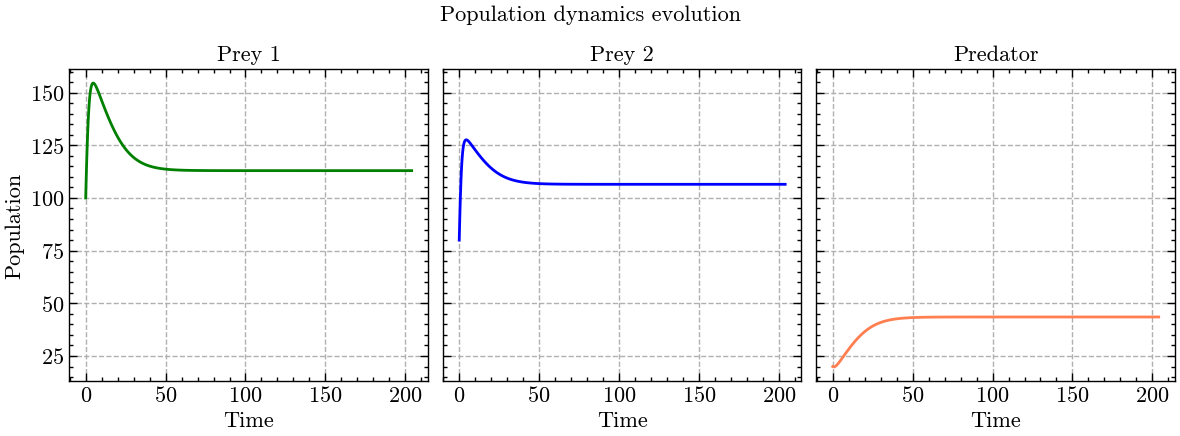

Simulation finished.


In [12]:
# Define all methods
methods = ['TRAPEZOIDAL', 'RK3', 'ASBUTCHER']

# Start 
print("Starting simulation...")
print()

# Loop over all methods
for method in methods:

    # Print the method
    print(f"------------------------------------------------")
    print(f"METHOD: {method}")
    print(f"------------------------------------------------")

    # Copy the parameters
    params = default_params.copy()

    # Set the method
    params['method'] = method

    # --------------- Integration ---------------

    # Start the timer
    start = time.time()

    # Integrate the system
    t, S = integrator(params)

    # Stop the timer
    end = time.time()

    # ------------------- Info -------------------

    print(f"INFO:")

    # Time and number of steps
    print(f"Time: {end - start:.2f} seconds")
    print(f"Number of steps: {len(t)}")

    # We use the last ten points to check for equilibrium
    equilibrium = np.all(np.isclose(S[-10:], S[-1], atol = 1e-6))

    print(f"Equilibrium reached: {equilibrium}")

    print(f"------------------------------------------------")

    # ----------------- Plotting -----------------

    print(f"RESULTS:")
    plot_results(t, S)

# End
print("Simulation finished.")

They all do seem to reach equilibrim.

## 2. Dynamical systems and equilibrium (5 points)

### Python class:

#### **(a)** Reorganise all your code from problem 1 into a single python class that contains attributes and methods. The settings and initial conditions should be attributes and all the python functions should become methods. Add a method to compute $L_2$-norm errors.

In [182]:
# Class implementation
class PopulationPredictor:
    """
    Puts all together.
    """
    def __init__(self, params = None):
        """
        Parameters
        ----------
        params : dict
            The system parameters.
        """
        # If no parameters are given, set default ones
        if params is None:
            params = {
            'g1': 1.0,
            'c1': 200.0,
            'p1': 0.01,
            'g2': 1.2,
            'c2': 150.0,
            'p2': 0.008,
            'e1': 0.08,
            'e2': 0.07,
            'd': 0.15,
            'x0': 100.0,
            'y0': 80.0,
            'z0': 20.0,
            't_span': (0, 200),
            'dt': 0.01,
            'method': 'RK3'
            }

        # --------------- Extraction ---------------

        # Parameters
        self.g1 = params['g1']
        self.p1 = params['p1']
        self.c1 = params['c1']
        self.c2 = params['c2']
        self.g2 = params['g2']
        self.p2 = params['p2']
        self.e1 = params['e1']
        self.e2 = params['e2']
        self.d = params['d']

        # Initial conditions
        self.x0 = params['x0']
        self.y0 = params['y0']
        self.z0 = params['z0']

        # Time stuff
        self.t_span = params['t_span']
        self.dt = params['dt']

        # Method
        self.method = params['method']

        # ------------- Initializations -------------

        # Time array
        t0, tf = self.t_span
        self.steps = int((tf - t0)/self.dt)
        self.t = np.linspace(t0, tf, self.steps + 1)

        # State array
        self.S = np.zeros((self.steps + 1, 3))
        self.S[0] = np.array([self.x0, self.y0, self.z0])

        # Exact solution
        self.t_exact, self.S_exact = self.exact_solution()

    def _slope(self, t, S):
        """
        It computes the slope the system.

        Parameters
        ----------
        t : float
            The time (not used).
        s : np.ndarray
            State vector, [x y z].

        Returns
        -------
        np.ndarray
            The slope of the system.
        """
        # Get the state variables
        x, y, z = S

        # Compute the slope
        dx_dt = self.g1*x*(1 - x/self.c1) - self.p1*x*z
        dy_dt = self.g2*y*(1 - y/self.c2) - self.p2*y*z
        dz_dt = self.e1*self.p1*x*z + self.e2*self.p2*y*z - self.d*z

        return np.array([dx_dt, dy_dt, dz_dt])
    
    def integrator(self, method = None):
        """
        Integrates the system based on the given parameters.

        Parameters
        ----------
        method : str
            The method to use.

        Returns
        -------
        np.ndarray
            The time vector.
        np.ndarray  
            The state vector.
        """
        # If no method is given
        if method is None:
            method = self.method

        # Integrate
        if self.method == 'RK3':
            t, S = self.rk3()

        elif self.method == 'TRAPEZOIDAL':
            t, S = self.trapezoidal()

        elif self.method == 'BUTCHER':
            t, S = self.butcher()

        else:
            raise ValueError(f"Method {self.method} is not available.")
        
        return t, S
    
    def trapezoidal(self):
        """
        It integrates the system using the trapezoidal method.

        Returns
        -------
        np.ndarray
            The time vector.
        np.ndarray
            The state vector."
        """ 
        # Integrate
        for i in range(0, self.steps):
            
            # Compute the slopes
            k1 = self._slope(self.t[i], self.S[i])
            k2 = self._slope(self.t[i] + self.dt, self.S[i] + self.dt*k1)

            # Update the state vector
            self.S[i + 1] = self.S[i] + self.dt*(k1 + k2)/2

        return self.t, self.S
    
    def rk3(self):
        """
        It integrates the system using the third-order Runge-Kutta method.

        Returns
        -------
        np.ndarray
            The time vector.
        np.ndarray
            The state vector.
        """
        # Integrate
        for i in range(0, self.steps):
            
            # Compute the slopes
            k1 = self._slope(self.t[i], self.S[i])
            k2 = self._slope(self.t[i] + self.dt/2, self.S[i] + self.dt*k1/2)
            k3 = self._slope(self.t[i] + self.dt, self.S[i] - self.dt*k1 + 2*self.dt*k2)

            # Update the state vector
            self.S[i + 1] = self.S[i] + self.dt*(k1 + 4*k2 + k3)/6

        return self.t, self.S
    
    def butcher(self):
        """
        Normal Butcher's method.

        Returns
        -------
        np.ndarray
            The time vector.
        np.ndarray
            The state vector.
        """
        # Integrate
        for i in range(0, self.steps):
            
            # Compute the slopes
            k1 = self._slope(self.t[i], self.S[i])
            k2 = self._slope(self.t[i] + self.dt/4, self.S[i] + (self.dt/4) * k1)
            k3 = self._slope(self.t[i] + self.dt/4, self.S[i] + (self.dt/8) * k1 + (self.dt/8) * k2)
            k4 = self._slope(self.t[i] + self.dt/2, self.S[i] - (self.dt/2) * k2 + self.dt * k3)
            k5 = self._slope(self.t[i] + 3*self.dt/4, self.S[i] + (3*self.dt/16) * k1 + (9*self.dt/16) * k4)
            k6 = self._slope(self.t[i] + self.dt, self.S[i] - (3*self.dt/7) * k1 + (2*self.dt/7) * k2 + (12*self.dt/7) * k3 - (12*self.dt/7) * k4 + (8*self.dt/7) * k5)
            
            # Update the state vector
            self.S[i + 1] = self.S[i] + self.dt/90 * (7*k1 + 32*k3 + 12*k4 + 32*k5 + 7*k6)

        return self.t, self.S
    
    def plot_results(self, t = None, S = None):
        """
        It plots the results.
        """
        # Call the integrator if no solution is given
        if t is None and S is None:
            t, S = self.integrator()

        # Plot
        fig, ax = plt.subplots(1, 3, figsize=(12, 4.5), sharey=True)

        plt.suptitle('Population dynamics evolution', fontsize=16)

        # Plot the results
        ax[0].plot(t, S[:, 0], color="green")
        ax[1].plot(t, S[:, 1], color="blue")
        ax[2].plot(t, S[:, 2], color="coral")

        # Labels
        ax[0].set_xlabel('Time')
        ax[0].set_ylabel('Population')
        ax[1].set_xlabel('Time')
        ax[2].set_xlabel('Time')

        ax[1].tick_params(axis='y', labelleft=False)
        ax[2].tick_params(axis='y', labelleft=False)

        # Titles
        ax[0].set_title('Prey 1')
        ax[1].set_title('Prey 2')
        ax[2].set_title('Predator')

        # Grid
        ax[0].grid(True, ls='--')
        ax[1].grid(True, ls='--')
        ax[2].grid(True, ls='--')

        plt.subplots_adjust(wspace=0.0)

        plt.tight_layout()
        plt.show()

    def exact_solution(self):
        """
        Approximates exact solution with RK45
        with high accuracy settings.

        Returns
        -------
        np.ndarray
            The time vector.
        np.ndarray
            The state vector.
        """
        # Solve the system
        sol = solve_ivp(self._slope, self.t_span, self.S[0], method = "RK45",
                        t_eval = self.t, rtol = 1e-13, atol = 1e-13)

        return sol.t, sol.y.T
    
    def euclidean_error(self):
        """
        Computes the Euclidean norm error between the numerical 
        and exact solutions across all time steps.
        
        Returns
        -------
        float
            The L2 error.
        """
        # Our solution
        _, S = self.integrator()

        # Compute the error
        norm = np.sqrt(np.mean(S - self.S_exact)**2)

        return norm

In [14]:
# Dictionary with the default parameters
params_2 = {
    'g1': 0.50,
    'c1': 100.0,
    'p1': 0.04,
    'g2': 1.3,
    'c2': 140.0,
    'p2': 0.01,
    'e1': 0.04,
    'e2': 0.08,
    'd': 0.20,
    'x0': 100.0,
    'y0': 80.0,
    'z0': 20.0,
    't_span': (0, 200),
    'dt': 0.01,
    'method': 'TRAPEZOIDAL'
}

### Error analysis:

#### **(b)** Call the methods from your python class above to run $15$ simulations ($5$ simulations per integration method) for $5$ decreasing values of the time step size, `dt` (i.e. $h$). Then, compute the $L_2$-norm errors for all these $15$ runs and report the results in a single figure with the $L_2$-norm errors in the Y axis and $h$ in the X axis. Which method produces the most accurate results?


In [15]:
# Define the step sizes
h_array = np.array([1, 0.5, 0.25, 0.1, 0.05])

In [16]:
# Little function
def get_errors(h_array, method, parameters = default_params):
    """
    Computes the errors for the given step sizes.

    Parameters
    ----------
    h_array : np.ndarray
        The step sizes.

    Returns
    -------
    np.ndarray
        The errors.
    """
    # Errors
    errors = []

    # Loop over all step sizes
    for h in h_array:

        # Copy the parameters
        params = parameters.copy()

        # Set the step size
        params['dt'] = h

        # Set the method
        params['method'] = method

        # Initialize the predictor
        predictor = PopulationPredictor(params)

        # Compute the error
        error = predictor.euclidean_error()

        # Store the error
        errors.append(error)

    return np.array(errors)

In [17]:
# Call it for all methods
errors_trapezoidal = get_errors(h_array, 'TRAPEZOIDAL')
errors_rk3 = get_errors(h_array, 'RK3')
errors_butcher = get_errors(h_array, 'BUTCHER')

In [18]:
# In order to estimate the slopes, take the log of each
log_trapezoidal = np.log(errors_trapezoidal)
log_rk3 = np.log(errors_rk3)
log_butcher = np.log(errors_butcher)
log_h = np.log(h_array)

# And find them
slope_trapezoidal = np.polyfit(log_h, log_trapezoidal, 1)[0]
slope_rk3 = np.polyfit(log_h, log_rk3, 1)[0]
slope_butcher = np.polyfit(log_h, log_butcher, 1)[0]

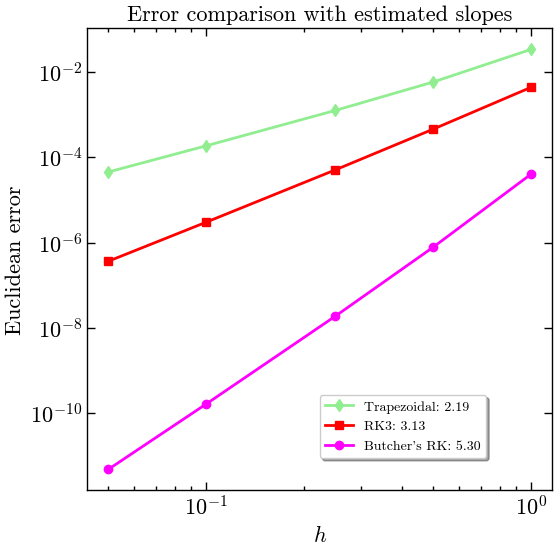

In [19]:
# Plot the results
plt.figure(figsize=(6, 6))

plt.plot(h_array, errors_trapezoidal, c = "lightgreen", marker = 'd',
         label = f"Trapezoidal: {slope_trapezoidal:.2f}")

plt.plot(h_array, errors_rk3, c = "r", marker = 's',
         label = f"RK3: {slope_rk3:.2f}")

plt.plot(h_array, errors_butcher, marker = 'o',c = "magenta",
         label = f"Butcher's RK: {slope_butcher:.2f}")

plt.loglog()

plt.xlabel(r"$h$")
plt.ylabel("Euclidean error")
plt.title("Error comparison with estimated slopes")

plt.legend(frameon = True, shadow = True, fontsize = 10, loc = (0.5,0.07))
plt.show()

The slopes align well with the expected values. Answering the question, **it's Butcher's RK the one that produces the most accurate results (also expected)**. 


### Equilibrium conditions:

#### **(c)** Write down the equilibrium condition for the system, $S(t)$. Then, create a python function that uses `sympy` to study the equilibrium populations of $x$, $y$, and $z$ for a range of values of the natural death rate of the predator, $d$. The function should accept a range of $d$ values and return the equilibrium populations for all the $d$ values in the range. Ensure that the solutions are filtered to exclude extinction cases.



In dynamical systems, the equilibrium points, also known as *fixed points*, are the ones where **the populations remain constant over time**. Mathematically, this is represented by
$$
\frac{dS}{dt} = 0.
$$
In our case:

\begin{aligned}
\frac{dx}{dt} &= g_1\,x \left( 1 - \frac{x}{c_1} \right) - p_1\,x\,z = 0, \\
\frac{dy}{dt} &= g_2\,y \left( 1 - \frac{y}{c_2} \right) - p_2\,y\,z = 0, \\
\frac{dz}{dt} &= e_1\,p_1\,x\,z + e_2\,p_2\,y\,z - d\,z = 0.
\end{aligned}

In [20]:
# Define the symbolic variables once only
x, y, z = sp.symbols('x y z')

# Define predator death rate array
d_array = np.linspace(0.01, 1.0, 100)

In [21]:
def equilibrium_points(d_array, params = default_params):
    """
    Computes the equilibrium points for the given parameters.

    Parameters
    ----------
    d_array : np.ndarray
        The predator death rates.
    params : dict
        The system parameters.

    Returns
    -------
    np.ndarray
        The equilibrium points.
    """
    # Extract the parameters
    g1 = params['g1']
    c1 = params['c1']
    p1 = params['p1']
    g2 = params['g2']
    c2 = params['c2']
    p2 = params['p2']
    e1 = params['e1']
    e2 = params['e2']

    # Define the equations that do not depend on d
    eq1 = g1*x*(1 - x/c1) - p1*x*z
    eq2 = g2*y*(1 - y/c2) - p2*y*z

    # Empty lists for the equilibrium and d values
    eq_points = []
    d_valid = []

    # Loop over all d-values
    for d in d_array:

        # Third equation
        eq3 = e1*p1*x*z + e2*p2*y*z - d*z

        # Solve the system
        sol = sp.solve([eq1, eq2, eq3], (x, y, z), dict = True)

        # Filter only positive and non-zero solutions
        sol = [s for s in sol if all(v > 0 for v in s.values())]

        # To avoid empty solutions
        if not sol:
            continue

        # Append the solutions
        eq_points.append(sol)

        # Append the d value
        d_valid.append(d)

        # Print the progress
        if len(eq_points) % 5 == 0:
            print(f"Processed {len(eq_points)} valid d parameters.")

    # Extract and convert to array
    eq_points = np.array([[s[0][x], s[0][y], s[0][z]] for s in eq_points])

    return eq_points, np.array(d_valid)

In [22]:
# Compute the equilibrium points
eq_points, d_points = equilibrium_points(d_array)

Processed 5 valid d parameters.
Processed 10 valid d parameters.
Processed 15 valid d parameters.
Processed 20 valid d parameters.


In [23]:
print(f"Minimum death rate value: {d_points.min():.3f}")
print(f"Maximum death rate value: {d_points.max():.3f}")

Minimum death rate value: 0.030
Maximum death rate value: 0.240


##### Same death-rate, different initial populations

In [61]:
# Different intial conditions
initial_conditions = np.array([[100, 80, 20],
                               [80, 100, 40],
                               [110, 90, 30],
                               [90, 110, 50],
                               [70, 60, 60]])

# Empty list for the solutions
solutions = []

# Loop over all initial conditions
for s0 in initial_conditions:

    # Copy the parameters
    params = default_params.copy()

    # Set the initial conditions
    params['x0'] = s0[0]
    params['y0'] = s0[1]
    params['z0'] = s0[2]

    # Integrate the system
    t, S = integrator(params)

    # Append the solution
    solutions.append(S)


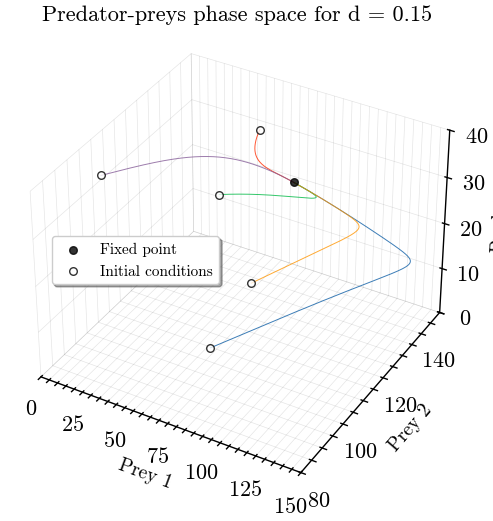

In [172]:
# Phase space plot
fig = plt.figure(figsize=(6, 8))
ax = fig.add_subplot(111, projection='3d')

# Title and labels
ax.set_title(f'Predator-preys phase space for d = {default_params["d"]}', fontsize=16)

ax.set_xlabel('Prey 1', fontsize=14)
ax.set_ylabel('Prey 2', fontsize=14)
ax.set_zlabel('Predator', fontsize=14)

# Solutions
for S in solutions:
    ax.plot(S[:, 0], S[:, 1], S[:, 2], alpha=0.8, lw=0.7)

# Equilibrium point
ax.scatter(S[-1, 0], S[-1, 1], S[-1, 2], color='black', marker='o', s=30,
           label = 'Fixed point', alpha=0.8)

# All initial conditions but not the last one
for s0 in initial_conditions[:-1]:
    ax.scatter(s0[0], s0[1], s0[2], edgecolor='k', facecolor='white', 
               linewidths = 1, s = 30, alpha=0.8)
    
# Last initial condition
ax.scatter(initial_conditions[-1][0], initial_conditions[-1][1], 
           initial_conditions[-1][2], edgecolor='k', facecolor='white', 
           linewidths = 1, s = 30, alpha=0.8, label = 'Initial conditions')

# Make the background transparent
ax.xaxis.pane.set_edgecolor('black')
ax.yaxis.pane.set_edgecolor('black')
ax.zaxis.pane.set_edgecolor('black')
ax.xaxis.pane.set_alpha(0.0)
ax.yaxis.pane.set_alpha(0.0)
ax.zaxis.pane.set_alpha(0.0)

# Make the grid almost transparent
ax.xaxis._axinfo["grid"]["color"] = (0, 0, 0, 0.1)
ax.yaxis._axinfo["grid"]["color"] = (0, 0, 0, 0.1)
ax.zaxis._axinfo["grid"]["color"] = (0, 0, 0, 0.1)

ax.xaxis._axinfo["grid"]["linewidth"] = 0.5
ax.yaxis._axinfo["grid"]["linewidth"] = 0.5
ax.zaxis._axinfo["grid"]["linewidth"] = 0.5

# Limits
ax.set_xlim(0, 150)
ax.set_ylim(80, 150)
ax.set_zlim(0, 40)

# Add a legend
ax.legend(loc=(0.10, 0.45), fontsize=11, frameon = True, shadow = True)

# Set the view angle
ax.view_init(roll=0, elev = 35)
plt.show()

#### **(d)** After computing equilibrium solutions for multiple values of the predator mortality $d$, you should create a high-quality figure of the equilibrium populations of $x$, $y$, and $z$ (on the Y axis) versus $d$ (on the x-axis), and label what happens in the parameter regions outside of equilibrium conditions.


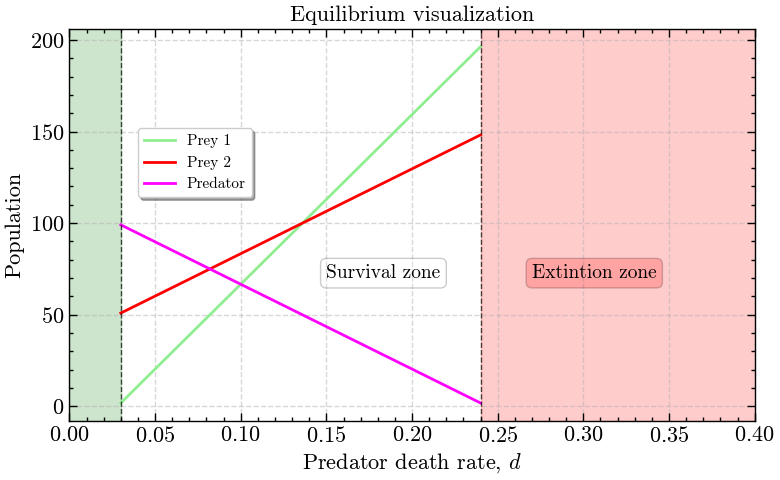

In [191]:
# ------------- Equilibrium --------------
plt.figure(figsize = (8, 5))

# Population vs death rate
plt.plot(d_points, eq_points[:, 0], c = "lightgreen", label = "Prey 1")
plt.plot(d_points, eq_points[:, 1], c = "r", label = "Prey 2")
plt.plot(d_points, eq_points[:, 2], c = "magenta", label = "Predator")

# Title and labels
plt.title("Equilibrium visualization")
plt.xlabel(r"Predator death rate, $d$")
plt.ylabel("Population")

plt.xlim(0, 0.40)
plt.legend(frameon = True, shadow = True, fontsize = 11, loc = (0.10,0.57))

# -------------- Extinction zones --------------
plt.axvspan(0.24, 0.5, alpha = 0.2, color='r')
plt.axvspan(0.00, 0.03, alpha = 0.2, color='g')

# Limit lines
plt.axvline(x = 0.24, color='k', linestyle='--', alpha=0.7, lw = 1)
plt.axvline(x = 0.03, color='k', linestyle='--', alpha=0.7, lw = 1)

# ----------------- Text boxes -----------------
plt.text(x = 0.27, y = 70, s = 'Extintion zone', fontsize = 14,
         bbox=dict(facecolor = 'r', alpha = 0.2, boxstyle='round'))

plt.text(x = 0.15, y = 70, s = 'Survival zone', fontsize = 14,
         bbox=dict(facecolor = 'w', alpha = 0.2, boxstyle='round'))

plt.grid(ls='--', alpha = 0.5)
plt.tight_layout()
plt.show()

Outside the specific range of $d$ found above, one of the three populations goes extinct. Specifically, when $d>0.24$, the predator population goes extinct, and when $d<0.03$, the prey $1$ one does. 

---

**Why prey $1$ goes extinct faster than prey $2$?**

I strongly think the parameters determine which prey population goes extinct *faster*. This can be seen by looking at the first two equations and some of the default parameters. Replacing such values in the equations yield

$$
\begin{aligned}
\frac{dx}{dt} &= x \left( 1 - \frac{x}{200} \right) - 0.01\,x\,z = 0, \\
\frac{dy}{dt} &= 1.2\,y \left( 1 - \frac{y}{150} \right) - 0.008\,y\,z = 0, \\
\end{aligned}
$$

which make evident why prey $1$ goes extinct faster than prey $2$: it has a lower growth rate, higher carrying capacity, and higher predation rate. 

---


#### **(e)** Based on your analysis, for what range of $d$ values the system reaches equilibrium? What happens outside of that range? Call your class again to run and compare equilibrium versus extinction scenarios using $3$ different values of $d$.


The system reaches equilibrium for (approximately) $d \in [0.03, 0.24]$, and outside of that range one of the three populations goes extinct.  

In [192]:
# Some good d values (prey extintion, survial and predator extinction)
d_array_2 = np.array([0.02, 0.12, 0.32])

Starting simulation...
----------------------------------
DEATH RATE: 0.02
----------------------------------


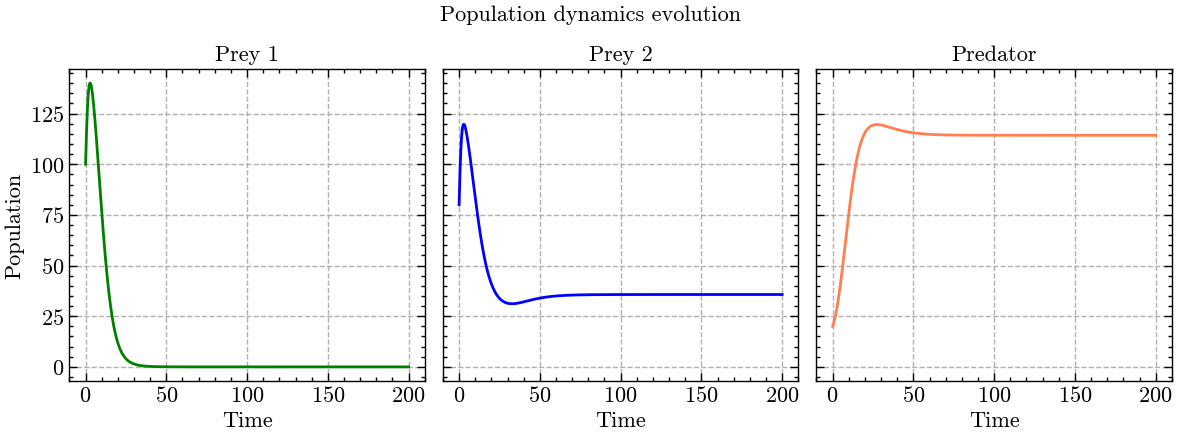

----------------------------------
DEATH RATE: 0.12
----------------------------------


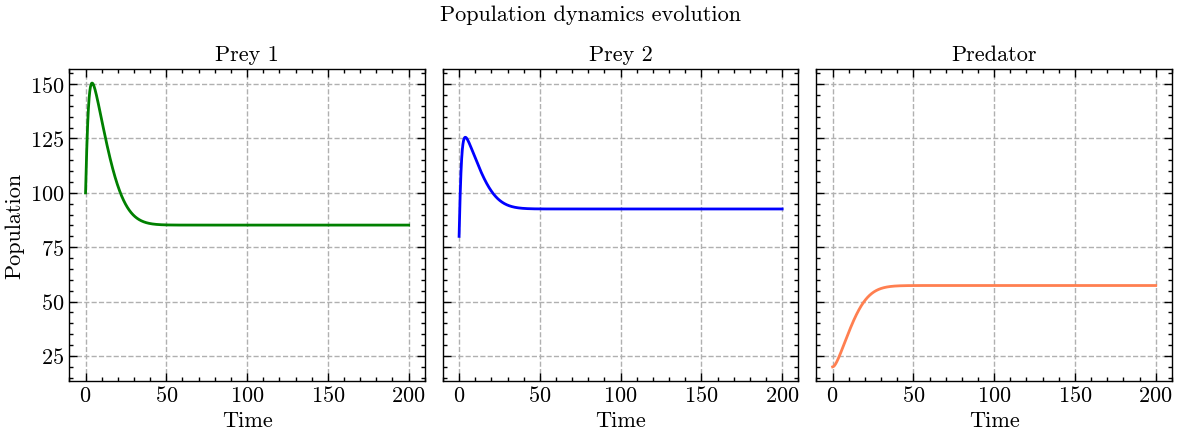

----------------------------------
DEATH RATE: 0.32
----------------------------------


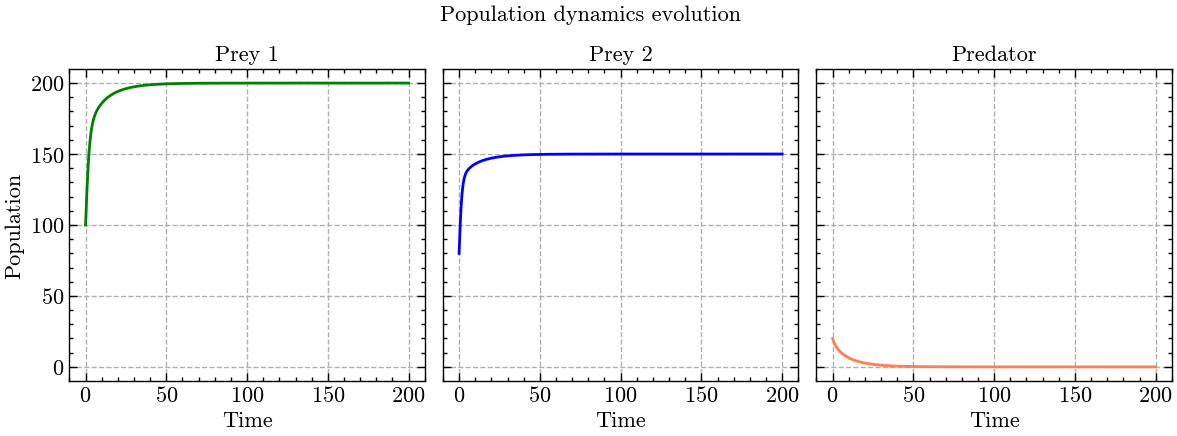

Simulation finished.


In [194]:
# Another list
solutions_2 = []

# Start
print("Starting simulation...")

# Loop over all d values
for d in d_array_2:

    # Copy the parameters
    params = default_params.copy()

    # Set the death rate
    params['d'] = d

    print(f"----------------------------------")
    print(f"DEATH RATE: {d}")
    print(f"----------------------------------")

    # Instantiate the predictor
    predictor = PopulationPredictor(params)

    # Plot the results
    predictor.plot_results()

# End
print("Simulation finished.")

Results are the expected ones :).

## 3. Quantum Harmonic Oscillator (7 points)

The Schrödinger equation for the quantum harmonic oscillator is:

$$-\frac{\hbar^2}{2m}\frac{d^2\psi}{dx^2}+\frac{1}{2}m\omega^2x^2\psi=E\psi$$

It can be rewritten, in terms of a new variable, $\xi\equiv\sqrt{\frac{m\,\omega}{\hbar}}x$, as follows:

$$\frac{d^2\psi}{d\xi^2}=\left(\xi^2 -K\right)\psi$$

where $K\equiv\frac{2E}{\hbar\omega}$ is the energy in units of $\frac{1}{2}\hbar\omega$.

### Order reduction and slope function:

**(a)** Reduce the above ODE to first order. Write down the resulting slope function.

### Shooting method class:

**(b)** Carefully read the tasks (c-g) below and design a suitable python class with attributes and methods that solves the above ODE using **the shooting method** with the slope computed in (a). You may use scipy integrators; there is no need to design your own integrators in this problem.

### Tasks to be performed by your python class:

**(c)** Find the **ground state energy** of the harmonic oscillator, to six significant digits, by using **the shooting method**. That is, solve the above equation numerically, varying $K$ until you get a wave function that goes to zero at large $\xi$. The appropriate boundary conditions for the ground state (and any even state) are $\psi(0) = 1$, $\psi'(0) = 0$.

**(d)** Make a few illustrative panels showing plots of the wave function for different values of $K$ as it converges to the solution. What does the tail of the wave function does when the values are slightly above or below the correct solution?

**(e)** Find the **first four excited state energies** (to six significant digits) for the harmonic oscillator, using **the shooting method**. For the first (and third) excited state you will need to set $\psi(0) = 0$, $\psi'(0) = 1$).

**(f)** Make a few illustrative panels showing plots of the wave functions for different values of $K$ as they converge to their respective solutions.

**(g)** Make a single plot showing the **harmonic potential** joinly with the **energy ladder** of the quantum harmonic oscillator (include the ground state plus the first four excited states that you calculated above, each with their **respective wave functions**). Consider the particle to be an electron and choose appropriate units for any physical parameters you may need.